# Neural Network implementation project

## Imporing required libraries

In [146]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

## loading dataset

In [147]:
def load_dataset(dataset):
    df = pd.read_csv(dataset)
    X = df.drop('target', axis=1)
    y = df.get('target')
    #X = (X-X.mean())/X.std()
    X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0,train_size=0.7)
    X_train = X_train.T
    y_train = y_train.values.reshape(1,y_train.values.shape[0])
    X_test = X_test.T
    y_test = y_test.values.reshape(1,y_test.values.shape[0])
    
    return X_train,y_train,X_test,y_test

In [148]:
X_train,y_train,X_test,y_test = load_dataset("heart.csv")

## Initializing Parameters

In [169]:
def initialize_parameters(layer_dims):
    np.random.seed(0)
    parameters = {}
    L = len(layer_dims)
    for l in range(1, L):
        parameters['W' + str(l)] = np.random.randn(layer_dims[l],layer_dims[l-1])
        parameters['b' + str(l)] = np.zeros((layer_dims[l],1))
    return parameters

## Forward propagation

In [170]:
def forward_propagation(X,parameters):
    linear = {}
    activations = {}
    activations["A0"] = X
    L = len(parameters) // 2
    for l in range(1, L):
        A_prev = activations["A"+str(l-1)]
        linear["Z"+str(l)] = np.dot(parameters["W"+str(l)],A_prev)+parameters["b"+str(l)]
        activations["A"+str(l)] = 1/(1+np.exp(-linear["Z"+str(l)]))
    A_prev = activations["A"+str(L-1)]
    linear["Z"+str(L)] = np.dot(parameters["W"+str(L)],A_prev)+parameters["b"+str(L)]
    activations["A"+str(L)] = 1/(1+np.exp(-linear["Z"+str(L)]))
    return linear,activations

## Computing Cost function

In [171]:
def compute_cost(AL,Y):
    
    m = Y.shape[1]
    cost = -np.sum(Y*np.log(AL)+(1-Y)*np.log(1-AL))/m
    
    return cost

## Backward propagation

In [172]:
def backward_propagation(AL, Y, linear,activations,parameters):
    grads = {}
    L = len(linear)
    m = AL.shape[1]
    Y = Y.reshape(AL.shape)
    grads["dZ"+str(L)] = AL-Y
    grads["dW" + str(L)] = 1./m * np.dot(grads["dZ"+str(L)],activations["A"+str(L)].T)
    grads["db" + str(L)] = 1./m * np.sum(grads["dZ"+str(L)],axis=1, keepdims=True)
    for l in reversed(range(L-1)):
        s = 1/(1+np.exp(-linear["Z"+str(l+1)]))
        grads["dZ"+str(l+1)] = np.dot(parameters['W'+str(l+2)].T,grads["dZ"+str(l+2)])*s*(1-s)
        grads["dW" + str(l + 1)] = 1./m * np.dot(grads["dZ"+str(l+1)],activations["A"+str(l)].T)
        grads["db" + str(l + 1)] = 1./m * np.sum(grads["dZ"+str(l+1)],axis=1, keepdims=True)
    return grads

## Updating the parameters

In [173]:
def update_parameters(parameters, grads, learning_rate):
    
    L = len(parameters) // 2
    
    for l in range(L):
        parameters["W" + str(l+1)] = parameters["W" + str(l+1)]-learning_rate*grads["dW" + str(l+1)]
        parameters["b" + str(l+1)] = parameters["b" + str(l+1)]-learning_rate*grads["db" + str(l+1)]
        
    return parameters

## Optimization function

In [174]:
def optimize(X, Y, layers_dims, learning_rate, num_iterations = 2500, print_cost=False,model_name = "Neural Network"):

    np.random.seed(1)
    costs = []
    parameters = initialize_parameters(layers_dims)

    for i in range(0, num_iterations):
        
        linear,activations = forward_propagation(X_train,parameters)
        L = len(parameters) // 2
        grads = backward_propagation(activations["A"+str(L)],y_train,linear,activations,parameters)
        cost = compute_cost(activations["A"+str(L)],Y)
        parameters = update_parameters(parameters,grads,learning_rate)
        
        if print_cost and i % 1000 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
        if print_cost and i % 1000 == 0:
            costs.append(cost)
    print ("Cost after iteration %i: %f" %(i, cost))
    # plot the cost
    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per hundreds)')
    plt.title(model_name+" at Learning rate =" + str(learning_rate))
    plt.show()
    
    return parameters,costs

Cost after iteration 0: 0.848451
Cost after iteration 1000: 0.586611
Cost after iteration 2000: 0.573728
Cost after iteration 3000: 0.577536
Cost after iteration 4000: 0.560609
Cost after iteration 5000: 0.569121
Cost after iteration 6000: 0.549399
Cost after iteration 7000: 0.562824
Cost after iteration 7499: 0.544090


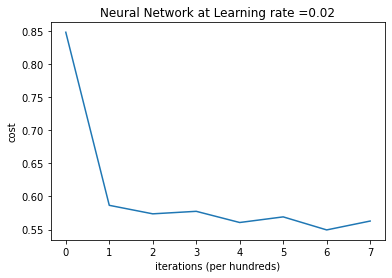

In [186]:
parameters,costs = optimize(X_train, y_train, [X_train.shape[0],20,20,1], learning_rate = 0.02, num_iterations = 7500, print_cost=True)

In [176]:
parameters["W3"].shape

(1, 20)

In [177]:
linear,activations = forward_propagation(X_test[225].values.reshape(13,1),parameters)
activations["A3"].shape

(1, 1)

Cost after iteration 0: 0.785711
Cost after iteration 1000: 0.689870
Cost after iteration 2000: 0.688116
Cost after iteration 3000: 0.686408
Cost after iteration 4000: 0.684765
Cost after iteration 5000: 0.683211
Cost after iteration 6000: 0.681766
Cost after iteration 7000: 0.680440
Cost after iteration 8000: 0.679232
Cost after iteration 9000: 0.678141
Cost after iteration 9999: 0.677158


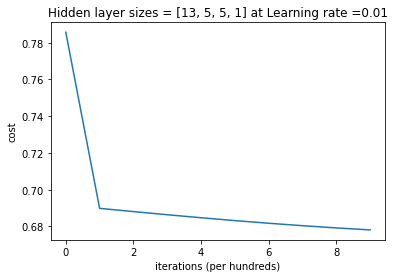

Cost after iteration 0: 0.659518
Cost after iteration 1000: 0.643742
Cost after iteration 2000: 0.637674
Cost after iteration 3000: 0.631155
Cost after iteration 4000: 0.625168
Cost after iteration 5000: 0.620723
Cost after iteration 6000: 0.614333
Cost after iteration 7000: 0.608677
Cost after iteration 8000: 0.605035
Cost after iteration 9000: 0.602074
Cost after iteration 9999: 0.599897


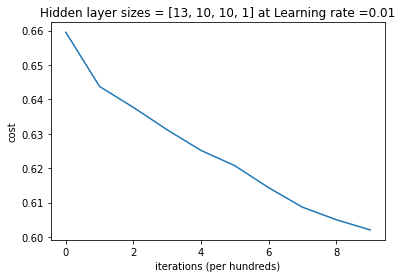

Cost after iteration 0: 0.848451
Cost after iteration 1000: 0.629480
Cost after iteration 2000: 0.621832
Cost after iteration 3000: 0.579432
Cost after iteration 4000: 0.575554
Cost after iteration 5000: 0.569329
Cost after iteration 6000: 0.563768
Cost after iteration 7000: 0.558017
Cost after iteration 8000: 0.552882
Cost after iteration 9000: 0.549384
Cost after iteration 9999: 0.546679


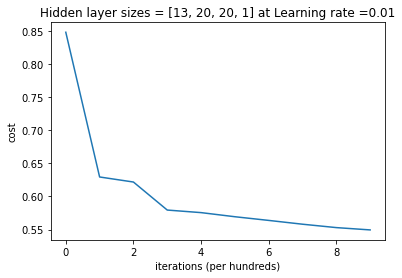

<ipython-input-170-cb5a10bd4c84>:9: RuntimeWarning: overflow encountered in exp
  activations["A"+str(l)] = 1/(1+np.exp(-linear["Z"+str(l)]))
<ipython-input-172-286ab35a1fa0>:10: RuntimeWarning: overflow encountered in exp
  s = 1/(1+np.exp(-linear["Z"+str(l+1)]))


Cost after iteration 0: 0.783057
Cost after iteration 1000: 0.621118
Cost after iteration 2000: 0.606258
Cost after iteration 3000: 0.590299
Cost after iteration 4000: 0.574481
Cost after iteration 5000: 0.545546
Cost after iteration 6000: 0.547479
Cost after iteration 7000: 0.539600
Cost after iteration 8000: 0.530925
Cost after iteration 9000: 0.526555
Cost after iteration 9999: 0.518283


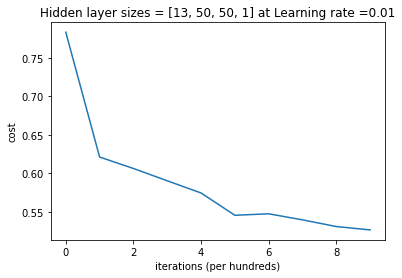

Cost after iteration 0: 2.841881


<ipython-input-170-cb5a10bd4c84>:9: RuntimeWarning: overflow encountered in exp
  activations["A"+str(l)] = 1/(1+np.exp(-linear["Z"+str(l)]))
<ipython-input-172-286ab35a1fa0>:10: RuntimeWarning: overflow encountered in exp
  s = 1/(1+np.exp(-linear["Z"+str(l+1)]))


Cost after iteration 1000: 0.548109
Cost after iteration 2000: 0.527646
Cost after iteration 3000: 0.520749
Cost after iteration 4000: 0.509392
Cost after iteration 5000: 0.501100
Cost after iteration 6000: 0.498799
Cost after iteration 7000: 0.501865
Cost after iteration 8000: 0.503046
Cost after iteration 9000: 0.505465
Cost after iteration 9999: 0.506209


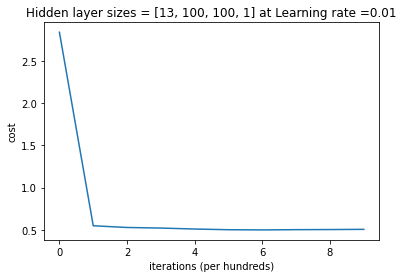

<ipython-input-170-cb5a10bd4c84>:9: RuntimeWarning: overflow encountered in exp
  activations["A"+str(l)] = 1/(1+np.exp(-linear["Z"+str(l)]))
<ipython-input-172-286ab35a1fa0>:10: RuntimeWarning: overflow encountered in exp
  s = 1/(1+np.exp(-linear["Z"+str(l+1)]))


Cost after iteration 0: 2.078157
Cost after iteration 1000: 0.506041
Cost after iteration 2000: 0.471320
Cost after iteration 3000: 0.454634
Cost after iteration 4000: 0.438173
Cost after iteration 5000: 0.432010
Cost after iteration 6000: 0.439285
Cost after iteration 7000: 0.434443
Cost after iteration 8000: 0.434374
Cost after iteration 9000: 0.423564
Cost after iteration 9999: 0.430702


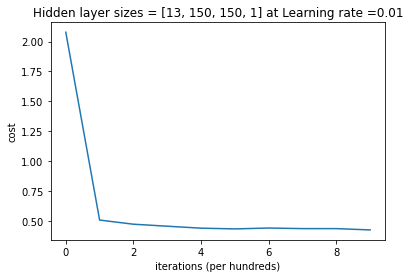

<ipython-input-170-cb5a10bd4c84>:9: RuntimeWarning: overflow encountered in exp
  activations["A"+str(l)] = 1/(1+np.exp(-linear["Z"+str(l)]))
<ipython-input-172-286ab35a1fa0>:10: RuntimeWarning: overflow encountered in exp
  s = 1/(1+np.exp(-linear["Z"+str(l+1)]))


Cost after iteration 0: 1.848325
Cost after iteration 1000: 0.467785
Cost after iteration 2000: 0.460292
Cost after iteration 3000: 0.467293
Cost after iteration 4000: 0.462439
Cost after iteration 5000: 0.457573
Cost after iteration 6000: 0.423846
Cost after iteration 7000: 0.429309
Cost after iteration 8000: 0.425306
Cost after iteration 9000: 0.420583
Cost after iteration 9999: 0.420958


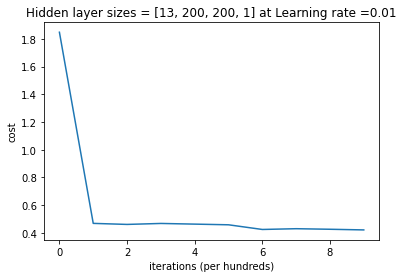

<ipython-input-170-cb5a10bd4c84>:9: RuntimeWarning: overflow encountered in exp
  activations["A"+str(l)] = 1/(1+np.exp(-linear["Z"+str(l)]))
<ipython-input-172-286ab35a1fa0>:10: RuntimeWarning: overflow encountered in exp
  s = 1/(1+np.exp(-linear["Z"+str(l+1)]))


Cost after iteration 0: 0.866593
Cost after iteration 1000: 0.389669
Cost after iteration 2000: 0.390287
Cost after iteration 3000: 0.379689
Cost after iteration 4000: 0.376386
Cost after iteration 5000: 0.387072
Cost after iteration 6000: 0.389957
Cost after iteration 7000: 0.389711
Cost after iteration 8000: 0.389271
Cost after iteration 9000: 0.386848
Cost after iteration 9999: 0.382113


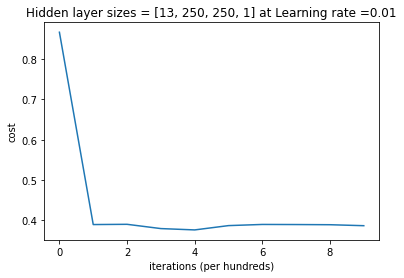

In [202]:
diff_hidden_layers_size = [[X_train.shape[0],5,5,1],[X_train.shape[0],10,10,1],
                           [X_train.shape[0],20,20,1],[X_train.shape[0],50,50,1],
                           [X_train.shape[0],100,100,1],[X_train.shape[0],150,150,1],
                           [X_train.shape[0],200,200,1],[X_train.shape[0],250,250,1]]

diff_hidden_layers_parameters = {}
diff_hidden_layers_costs = {}
count = 1

for hidden_layer in diff_hidden_layers_size:
    model_name = "Hidden layer sizes = "+str(hidden_layer)
    parameters,cost = optimize(X_train, y_train, hidden_layer, learning_rate = 0.01, num_iterations = 10000, print_cost=True,model_name = model_name)
    diff_hidden_layers_parameters["NN"+str(hidden_layer)] = parameters
    diff_hidden_layers_costs["NN"+str(count)] = cost
    count += 1

In [125]:
diff_hidden_layers_costs

{'NN1': [0.6742475102640869,
  0.34611284576696183,
  0.29698382168386567,
  0.25750225796313897,
  0.2256166734702535,
  0.2035292972186034,
  0.18078405662351874,
  0.15623342171302648,
  0.13236841009505607,
  0.11322179310344557],
 'NN2': [1.1625663959462895,
  0.32760230894601217,
  0.2832855603572259,
  0.2538946353398461,
  0.21904065682340734,
  0.17300912010916486,
  0.1359779327453295,
  0.10293326112949236,
  0.0754305420429044,
  0.05287785442447188],
 'NN3': [0.9091831417548997,
  0.36100573091299515,
  0.28645951193712227,
  0.22020360428672736,
  0.16314249835295638,
  0.10659007618946474,
  0.0647174244363357,
  0.042781139490520856,
  0.027977623007444778,
  0.018352708688199923],
 'NN4': [2.9978208233120287,
  0.17634362393911554,
  0.13287566261646233,
  0.11432797363399543,
  0.09014375707020496,
  0.05795868566131856,
  0.029272496628959428,
  0.022921177217831646,
  0.016932022340782317,
  0.012225081373685238],
 'NN5': [1.2689008779380604,
  0.12759528528441694,


## Using model for prediction

In [198]:
def model_predict(x,parameters):
    activations["A0"] = x
    L = len(parameters) // 2
    for l in range(1, L):
        A_prev = activations["A"+str(l-1)]
        linear["Z"+str(l)] = np.dot(parameters["W"+str(l)],A_prev)+parameters["b"+str(l)]
        activations["A"+str(l)] = 1/(1+np.exp(-linear["Z"+str(l)]))
    linear["Z"+str(L)] = np.dot(parameters["W"+str(L)],activations["A"+str(l)])+parameters["b"+str(L)]
    print(linear["Z"+str(L)].shape)
    y = 1/(1+np.exp(-linear["Z"+str(L)]))
    return y

In [199]:
def predict(x,parameters):
    y = model_predict(x,parameters)
    y[y>=0.5] = 1
    y[y<0.5] = 0
    return y

In [213]:
predictions = predict(X_test,diff_hidden_layers_parameters["NN[13, 100, 100, 1]"])
predictions = predictions.astype(int)
predictions

(1, 91)


<ipython-input-198-426a5815e97a>:7: RuntimeWarning: overflow encountered in exp
  activations["A"+str(l)] = 1/(1+np.exp(-linear["Z"+str(l)]))


array([[0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
        0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0,
        1, 0, 1]])

In [184]:
y_test

array([[0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
        0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0,
        1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0,
        0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
        1, 0, 0]], dtype=int64)